# Data Exploration, Transformation and Cleansing of Stroke Dataset

## 1. Firstly the necessary libraries are loaded including numpy, pandas, scipy and matplotlib

In [1]:
# Import Libraries
try:
    import numpy as np
    import pandas as pd
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    %matplotlib inline
    from sklearn.decomposition import PCA
    print('The libraries were loaded successfully')
    
except:
    print('There was an error loading the libraries')

The libraries were loaded successfully


## 2. The dataset is loaded from a csv and the top rows are loaded

In [2]:
# Load Dataset
df_stroke = pd.read_csv('data/healthcare-dataset-stroke-data.csv',delimiter=',',header='infer')

# Display Top Rows of the Dataset
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 3. The shape of the dataset is identified

In [3]:
# Identify the shape of the dataset
shape = df_stroke.shape

print(f'The data set has {shape[0]} rows')
print(f'The data set has {shape[1]} columns')

The data set has 5110 rows
The data set has 12 columns


## 4. Identify the type of data in each column

In [4]:
# Identify Each Column's Data Types
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 5. Identify if there is duplicated data

In [5]:
# Identify if the Dataset contains duplicated rows
duplicated_rows = df_stroke.duplicated().sum()
print(f'There are {duplicated_rows} duplicated rows')


There are 0 duplicated rows


## 6. Describe numerical columns

In [6]:
# Obtain Summary Information on Numerical Columns
df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 7. Describe categorical columns

In [7]:
# Obtain Summary Information on String Columns
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_stroke[categorical_variables].describe()    

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## 8. Identify all the unique values in the categorical columns

In [8]:
# Identify all the unique values in the categorical columns
for col in categorical_variables:
    print(f'The unique values for the column {col} are:')
    print(df_stroke[col].unique())
    print('\n')

The unique values for the column gender are:
['Male' 'Female' 'Other']


The unique values for the column ever_married are:
['Yes' 'No']


The unique values for the column work_type are:
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


The unique values for the column Residence_type are:
['Urban' 'Rural']


The unique values for the column smoking_status are:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']




## 9. Convert categorical columns to numerical

In [9]:
# Convert gender from a categorical column to numerical column
df_stroke.gender = pd.Categorical(df_stroke.gender)
df_stroke['gender'] = df_stroke.gender.cat.codes
print('The values in the column gender have been updated from male to 1 and female to 0\n')

# Convert ever_married from a categorical column to numerical column
df_stroke.ever_married = pd.Categorical(df_stroke.ever_married)
df_stroke['ever_married'] = df_stroke.ever_married.cat.codes
print('The values in the column ever_married have been updated from yes to 1 and no to 0\n')

# Convert ever_married from a categorical column to numerical column
df_stroke.work_type = pd.Categorical(df_stroke.work_type)
df_stroke['work_type'] = df_stroke.work_type.cat.codes
print('''The values in the column work_type have been updated from Private to 2, from Self-employed to 3,
from Govt_job to 0, from children to 4 and from Never_worked to 1\n''')

# Convert Residence_type from a categorical column to numerical column
df_stroke.Residence_type = pd.Categorical(df_stroke.Residence_type)
df_stroke['Residence_type'] = df_stroke.Residence_type.cat.codes
print('The values in the column Residence_type have been updated from Urban to 1 and from Rural to 0\n')

# Convert smoking_status from a categorical column to numerical column
df_stroke.smoking_status = pd.Categorical(df_stroke.smoking_status)
df_stroke['smoking_status'] = df_stroke.smoking_status.cat.codes
print('''The values in the column smoking_status have been updated from formerly smoked to 1,
from never smoked to 2, from smokes to 3, from Unknown to 0\n''')

The values in the column gender have been updated from male to 1 and female to 0

The values in the column ever_married have been updated from yes to 1 and no to 0

The values in the column work_type have been updated from Private to 2, from Self-employed to 3,
from Govt_job to 0, from children to 4 and from Never_worked to 1

The values in the column Residence_type have been updated from Urban to 1 and from Rural to 0

The values in the column smoking_status have been updated from formerly smoked to 1,
from never smoked to 2, from smokes to 3, from Unknown to 0



## 10. Now we can review the transformed dataset

In [10]:
# View the top rows in the transformed dataset
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [11]:
# View the summary statistics for all the transformed columns
df_stroke.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.854067,1.071534,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.500000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,33.100000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


## 11. Identify the features that correlate with strokes

In [12]:
# dentify the features that correlate with strokes
x = df_stroke.corr()
pd.DataFrame(x['stroke']).sort_values(by='stroke',ascending = False).style.background_gradient(cmap = 'Blues')

,stroke
stroke,1.000000
age,0.245257
heart_disease,0.134914
avg_glucose_level,0.131945
hypertension,0.127904
ever_married,0.108340
bmi,0.042374
smoking_status,0.028123
Residence_type,0.015458
gender,0.008929


In [13]:
# dentify all the features correlations
x.sort_values(by='stroke',ascending = False).style.background_gradient(cmap = 'Blues')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
stroke,0.006388,0.008929,0.245257,0.127904,0.134914,0.108340,-0.032316,0.015458,0.131945,0.042374,0.028123,1.000000
age,0.003538,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.333398,0.265199,0.245257
heart_disease,-0.001296,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.041357,0.048460,0.134914
avg_glucose_level,0.001092,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.175502,0.063437,0.131945
hypertension,0.003550,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.167811,0.111038,0.127904
ever_married,0.013690,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.341695,0.259647,0.108340
bmi,0.003084,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.224473,0.042374
smoking_status,0.014074,-0.062581,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.224473,1.000000,0.028123
Residence_type,-0.001403,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000122,0.008237,0.015458
gender,0.002511,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026678,-0.062581,0.008929


C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shap

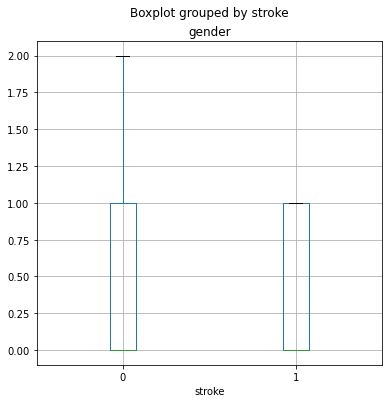

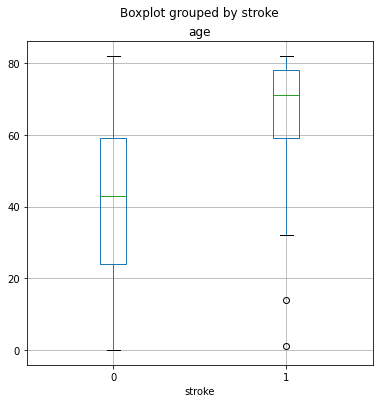

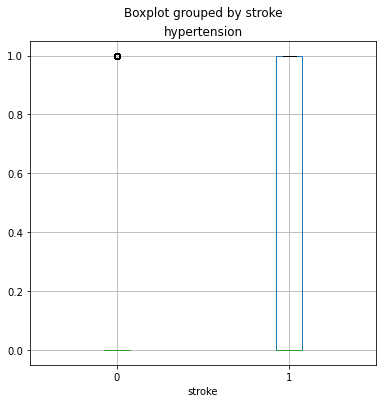

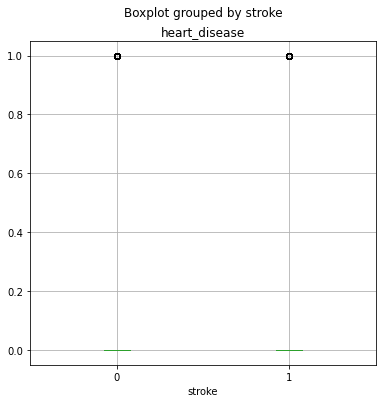

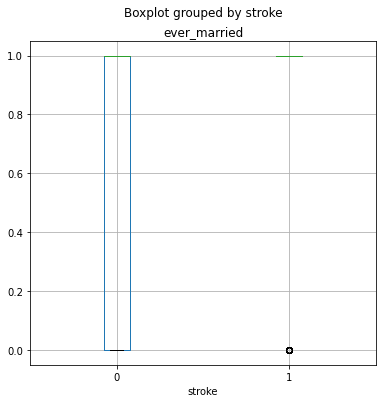

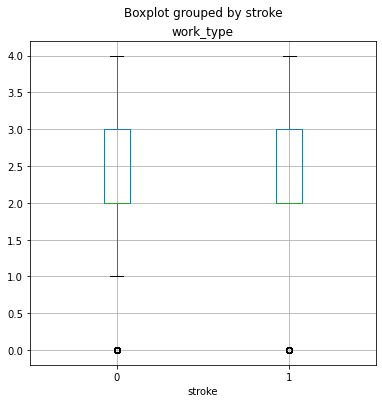

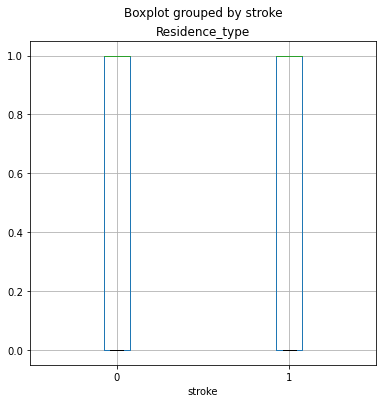

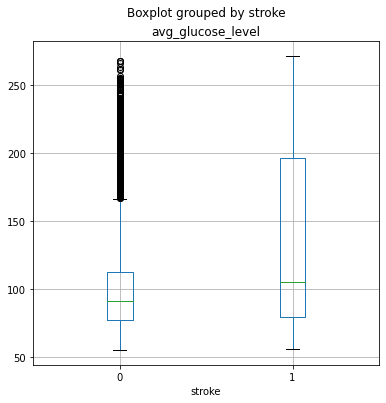

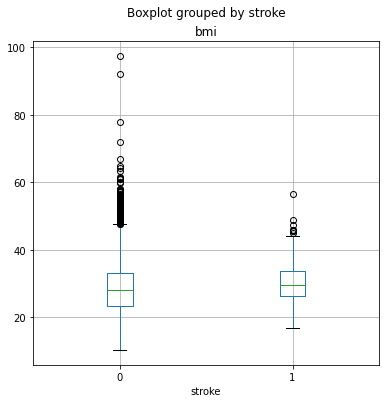

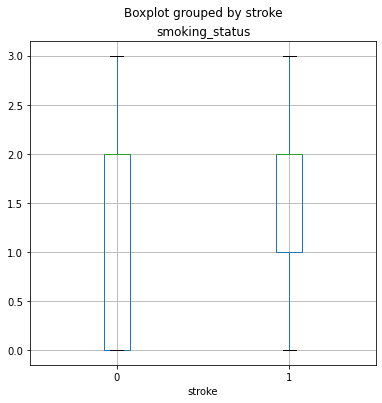

In [14]:
# Define the features
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

# For each feature create a boxplot against the label
for col in features:
    df_stroke.boxplot(column=col, by='stroke', figsize=(6,6))
    plt.title(col)
plt.show()

## 12. Identify if there is null data

In [15]:
# Identify Features with Null Values
df_stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## 13. Remove rows with missing values

In [16]:
# Drop Rows with Null Values
df_stroke = df_stroke.dropna(axis=0, how='any')
df_stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## 14. Exploring stroke patient vs non-stroke patient population

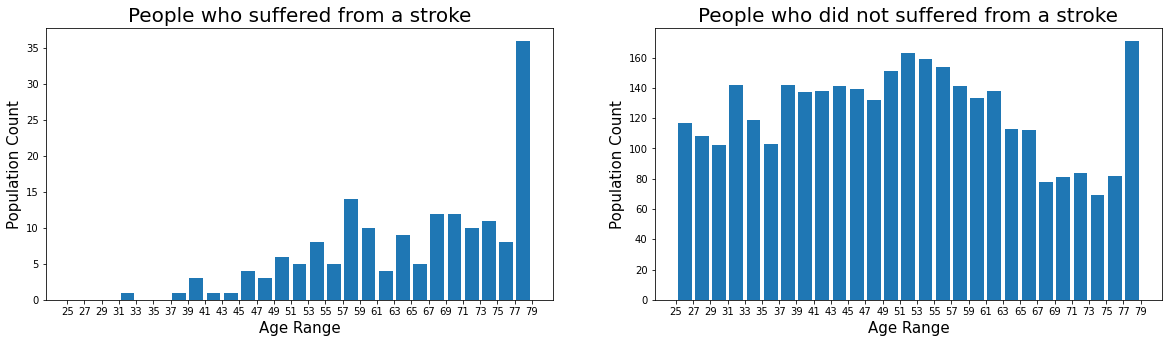

In [17]:
fig, (ax3,ax4) = plt.subplots(1,2, figsize = (20,5))
plt.subplots_adjust(hspace = 0.5)
bin_x = range(25,80,2)

# Create plot of the age distribution of stroke sufferers
ax3.hist(df_stroke[df_stroke['stroke']==1].age.tolist(),bins=bin_x,rwidth=0.8)
ax3.set_xticks(range(25,80,2))
ax3.set_xlabel('Age Range',fontsize=15)
ax3.set_ylabel('Population Count',fontsize=15)
ax3.set_title('People who suffered from a stroke',fontsize=20)

# Create plot of the age distribution of individuals who did not suffer a stroke
ax4.hist(df_stroke[df_stroke['stroke']==0].age.tolist(),bins=bin_x,rwidth=0.8)
ax4.set_xticks(range(25,80,2))
ax4.set_xlabel('Age Range',fontsize=15)
ax4.set_ylabel('Population Count',fontsize=15)
ax4.set_title('People who did not suffered from a stroke',fontsize=20)

plt.show()

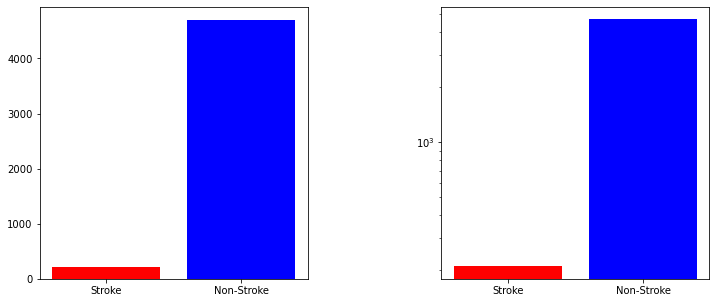

In [18]:
fig, (ax6,ax7) = plt.subplots(1,2,figsize = (12,5),constrained_layout=False)
plt.subplots_adjust(wspace = 0.5)

# Create a plot of stroke vs non stroke individuals 
ax6.bar(df_stroke.stroke.unique(),df_stroke.stroke.value_counts(),color = ['blue','red'],width = 0.8)
ax6.set_xticks(df_stroke.stroke.unique())
ax6.set_xticklabels(('Non-Stroke','Stroke'))

# Create a plot of stroke vs non stroke individuals in log scale
ax7.bar(df_stroke.stroke.unique(),df_stroke.stroke.value_counts(),color = ['blue','red'],width = 0.8)
ax7.set_xticks(df_stroke.stroke.unique())
ax7.set_xticklabels(('Non-Stroke','Stroke'))
ax7.set_yscale('log')

# Display both plots
plt.show()

In [19]:
# Identify the number of records for individuals who had a stroke and who had not
df_stroke.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

## 15. Explore gender within the sample population

In [20]:
# Identify the number of females
female_count = df_stroke.gender.value_counts().tolist()[0]
print('Female :',female_count)

# Identify the number of males
male_count = df_stroke.gender.value_counts().tolist()[1]
print('Male :',male_count)

# Identify the number of "others"
other_count = df_stroke.gender.value_counts().tolist()[2]
print('Other :',other_count)

Female : 2897
Male : 2011
Other : 1


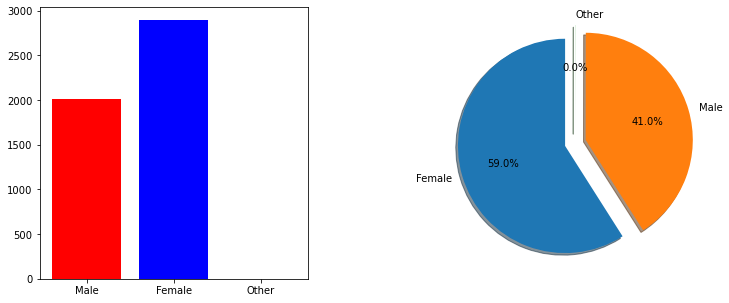

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=False)
plt.subplots_adjust(wspace = 0.5)

# Create a bar chart showing the number of individuals per gender
ax1.bar(df_stroke.gender.unique(),df_stroke.gender.value_counts(),color = ['blue','red'],width = 0.8)
ax1.set_xticks(df_stroke.gender.unique())
ax1.set_xticklabels(('Female','Male', "Other"))

# Create a pie chart showing the number of individuals per gender
ax2.pie((female_count, male_count, other_count), labels = ('Female','Male', "Other"), autopct='%1.1f%%', shadow=True, startangle=90, explode=[0.1, 0.1 ,0.1])

plt.show()

In [22]:
"""fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=False)
plt.subplots_adjust(wspace = 0.5)

# Create a bar chart of gender distribution in individuals who had a stroke
ax1.bar(df_stroke[df_stroke['stroke']==1].gender.unique(),df_stroke[df_stroke['stroke']==1].gender.value_counts(),color = ['blue','red'],width = 0.8)
ax1.set_xticks(df_stroke.gender.unique())
ax1.set_xticklabels(('Female','Male'))

# Create a pie chart of gender distribution in individuals who had a stroke
ax2.pie((female_count, male_count), labels = ('Female','Male'), autopct='%1.1f%%', shadow=True, startangle=90, explode=[0.1, 0.1])

plt.show()"""

"fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=False)\nplt.subplots_adjust(wspace = 0.5)\n\n# Create a bar chart of gender distribution in individuals who had a stroke\nax1.bar(df_stroke[df_stroke['stroke']==1].gender.unique(),df_stroke[df_stroke['stroke']==1].gender.value_counts(),color = ['blue','red'],width = 0.8)\nax1.set_xticks(df_stroke.gender.unique())\nax1.set_xticklabels(('Female','Male'))\n\n# Create a pie chart of gender distribution in individuals who had a stroke\nax2.pie((female_count, male_count), labels = ('Female','Male'), autopct='%1.1f%%', shadow=True, startangle=90, explode=[0.1, 0.1])\n\nplt.show()"

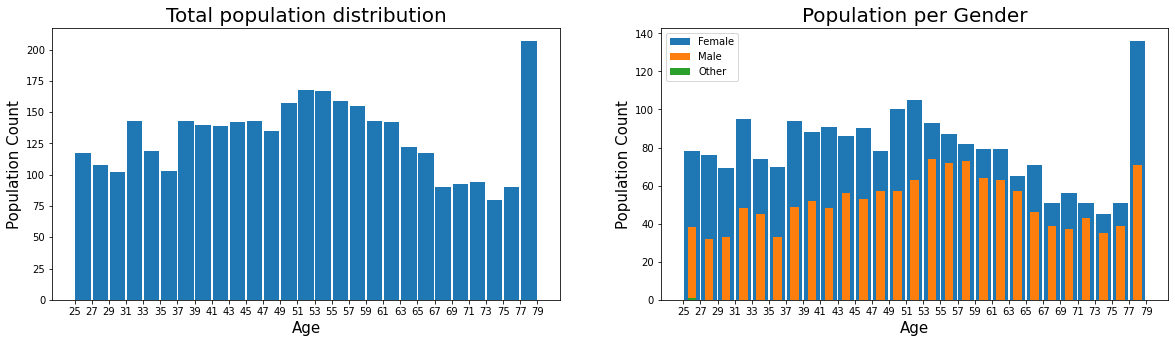

In [23]:
# Population Distribution with age and sex
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,5),constrained_layout=False)
bin_x = range(25,80,2)

# Population Age Distribution
ax1.hist(df_stroke.age.tolist(),bins=bin_x,rwidth=0.9)
ax1.set_xticks(range(25,80,2))
ax1.set_xlabel('Age',fontsize=15)
ax1.set_ylabel('Population Count',fontsize=15)
ax1.set_title('Total population distribution',fontsize=20)

# Population Age Distribution by Sex
ax2.hist(df_stroke[df_stroke['gender']==0].age.tolist(),label = 'Female',bins=bin_x,rwidth=0.9)
ax2.hist(df_stroke[df_stroke['gender']==1].age.tolist(),label = 'Male',bins=bin_x,rwidth=0.5)
ax2.hist(df_stroke[df_stroke['gender']==2].age.tolist(),label = 'Other',bins=bin_x,rwidth=0.5)
ax2.legend()
ax2.set_xticks(range(25,80,2))
ax2.set_xlabel('Age',fontsize=15)
ax2.set_ylabel('Population Count',fontsize=15)
ax2.set_title('Population per Gender',fontsize=20)

plt.show()

## 17. The ID column will be removed as it is not needed to train the machine learning model

In [24]:
# Remove ID Column
try:
    del df_stroke['id']
    print('The column "id" was successfully deleted')
except:
    print('The column "id" was not deleted')

The column "id" was successfully deleted


## 18. Now that the data has been transformed and cleansed it will be saved as a csv for use in the classification model

In [25]:
# Save the transformed dataset
df_stroke.to_csv('data/cleansed-healthcare-dataset-stroke-data.csv', index=False)
print('The csv was successfully saved as cleansed-healthcare-dataset-stroke-data.csv')

The csv was successfully saved as cleansed-healthcare-dataset-stroke-data.csv


## 19. Additional Exploratory Methods

Reduced dataset shape: (4909, 2)
Meaning of the 2 components:
0.001 x gender + 0.156 x age + 0.001 x hypertension + 0.001 x heart_disease + 0.002 x ever_married + -0.002 x work_type + -0.000 x Residence_type + 0.987 x avg_glucose_level + 0.036 x bmi + 0.002 x smoking_status
0.001 x gender + -0.980 x age + -0.003 x hypertension + -0.002 x heart_disease + -0.014 x ever_married + 0.018 x work_type + -0.000 x Residence_type + 0.160 x avg_glucose_level + -0.116 x bmi + -0.013 x smoking_status


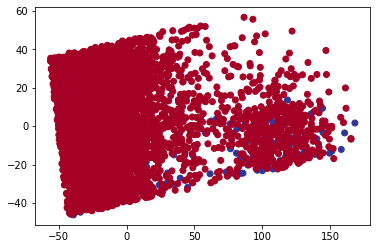

In [28]:
# PCA Reduction
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
label = 'stroke'

X, y = df_stroke[features].values, df_stroke[label].values
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            features)))

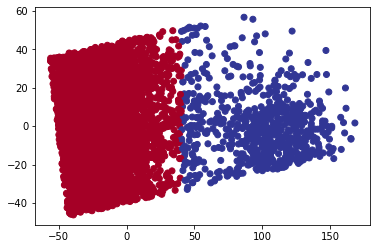

In [29]:
# K means clustering

from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');